Dataset: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
<br/>
scikit-learn: https://scikit-learn.org/stable/supervised_learning.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read data
data = pd.read_csv("./heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
# get number of observations and attributes
data.shape

(299, 13)

In [3]:
# check data completeness
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
# correlation matrix
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


# Modeling

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# keep only continuous features
X = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]

# or keep binary features too
# X = data.iloc[:, :-1];

y = data["DEATH_EVENT"]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

Text(0, 0.5, 'cohen kappa')

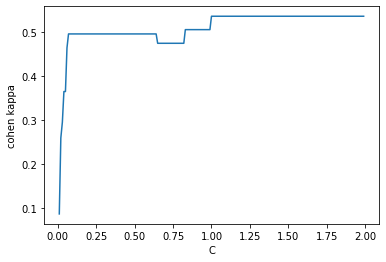

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

# Logistic Regression
max_kappa = -1
max_kappa_accuracy = -1
max_kappa_cm = []
# C inverse of regularization strength lambda
max_kappa_C = -1
kappas = []
for C in np.arange(0.01,2,0.01):
    regression = LogisticRegression(C=C).fit(X_train_scaled, y_train)
    prediction = regression.predict(X_test_scaled)
    kappa = cohen_kappa_score(y_test, prediction)
    kappas.append(kappa)
    if kappa > max_kappa:
        max_kappa = kappa
        max_kappa_accuracy = accuracy_score(y_test, prediction)
        max_kappa_cm = confusion_matrix(y_test, prediction)
        max_kappa_C = C
plt.plot(np.arange(0.01,2,0.01), kappas)
plt.xlabel("C")
plt.ylabel("cohen kappa")

In [7]:
print("max cohen kappa:", max_kappa, "at C =", max_kappa_C)
print("accuracy:", max_kappa_accuracy)
print("confusion matrix:\n", max_kappa_cm)

max cohen kappa: 0.5366614664586584 at C = 1.0
accuracy: 0.8181818181818182
confusion matrix:
 [[64  4]
 [14 17]]


# Support Vector Machine

In [8]:
# generic classifier evaluation
def classifier_eval(model):
    regression = model.fit(X_train_scaled, y_train)
    prediction = regression.predict(X_test_scaled)
    print("cohen kappa:", cohen_kappa_score(y_test, prediction))
    print("accuracy:", accuracy_score(y_test, prediction))
    print("confusion matrix:\n", confusion_matrix(y_test, prediction))

from sklearn.svm import SVC
classifier_eval(SVC())

cohen kappa: 0.5454081632653062
accuracy: 0.8181818181818182
confusion matrix:
 [[63  5]
 [13 18]]


# Nearest Neighbor

Text(0, 0.5, 'cohen kappa')

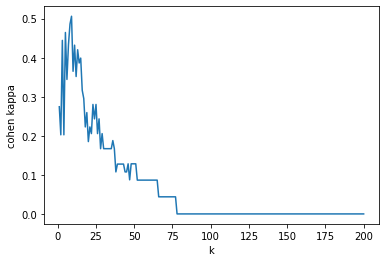

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Nearest Neighbor
max_kappa = -1
max_kappa_accuracy = -1
max_kappa_cm = []
# k number of neighbors
max_kappa_k = -1
kappas = []
for k in range(1, len(X_train) + 1):
    regression = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
    prediction = regression.predict(X_test_scaled)
    kappa = cohen_kappa_score(y_test, prediction)
    kappas.append(kappa)
    if kappa > max_kappa:
        max_kappa = kappa
        max_kappa_accuracy = accuracy_score(y_test, prediction)
        max_kappa_cm = confusion_matrix(y_test, prediction)
        max_kappa_k = k
plt.plot(range(1, len(X_train_scaled) + 1), kappas)
plt.xlabel("k")
plt.ylabel("cohen kappa")

In [10]:
print("max cohen kappa:", max_kappa, "at k =", max_kappa_k)
print("accuracy:", max_kappa_accuracy)
print("confusion matrix:\n", max_kappa_cm)

max cohen kappa: 0.5061695983197689 at k = 9
accuracy: 0.8080808080808081
confusion matrix:
 [[64  4]
 [15 16]]


# Guassian Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier_eval(GaussianNB())

cohen kappa: 0.32395520349631246
accuracy: 0.7474747474747475
confusion matrix:
 [[63  5]
 [20 11]]


# Decision Tree via Entropy

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier_eval(DecisionTreeClassifier(criterion="entropy", random_state=0))

cohen kappa: 0.6242884250474383
accuracy: 0.8383838383838383
confusion matrix:
 [[60  8]
 [ 8 23]]


# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier_eval(RandomForestClassifier(random_state=0))

cohen kappa: 0.6529794692038058
accuracy: 0.8585858585858586
confusion matrix:
 [[64  4]
 [10 21]]


# Stocastic Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
# stochastic when subsample < 1.0
classifier_eval(GradientBoostingClassifier(subsample=0.5, random_state=0))

cohen kappa: 0.631605060778963
accuracy: 0.8484848484848485
confusion matrix:
 [[63  5]
 [10 21]]
